In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold
import tensorflow as tf
import cv2
import os
import numpy as np

Using TensorFlow backend.


In [2]:
labels = ['Fire', 'No-Fire'] #the binary labels for our classification

In [6]:
#import training data
training_data = []
for label in labels: #will start by importing the 'Fire' images, then the 'No Fire' images
    if label == labels[0]:
        path = 'C:\\Users\\juste\\Documents\\Masters\\Data Science\\Proposal\\Training\\Training\\Fire' #when implementing the code yourself change this path to where you have this dataset saved
    elif label == labels[1]:
        path = 'C:\\Users\\juste\\Documents\\Masters\\Data Science\\Proposal\\Training\\Training\\No_Fire' #when implementing the code yourself change this path to where you have this dataset saved
    class_value = labels.index(label) #returns 0 for 'Fire', and 1 for 'No-Fire'
    for image in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, image))[...,::-1] #joins the image name and appends it onto the file path to access the image, and then reads it as an array
        resized_image_array = cv2.resize(image_array, (90, 90)) #resizes the images into a 90 x 90 pixel size
        training_data.append([resized_image_array, class_value]) #appends the resized image array alongside the class label into a list
training_data = np.array(training_data) #converts the list into an array

C:\Anaconda\envs\ce802\lib\site-packages\ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


In [7]:
#import test data
test_data = [] 
for label in labels: #will start by importing the 'Fire' images, then the 'No Fire' images
    if label == labels[0]:
        path = 'C:\\Users\\juste\\Documents\\Masters\\Data Science\\Proposal\\Test\\Test\\Fire' #when implementing the code yourself change this path to where you have this dataset saved
    elif label == labels[1]:
        path = 'C:\\Users\\juste\\Documents\\Masters\\Data Science\\Proposal\\Test\\Test\\No_Fire' #when implementing the code yourself change this path to where you have this dataset saved
    class_value = labels.index(label) #returns 0 for 'Fire', and 1 for 'No-Fire'
    for image in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, image))[...,::-1] #joins the image name and appends it onto the file path to access the image, and then reads it as an array
        resized_image_array = cv2.resize(image_array, (90, 90)) #resizes the images into a 90 x 90 pixel size
        test_data.append([resized_image_array, class_value]) #appends the resized image array alongside the class label into a list
test_data = np.array(test_data) #converts the list into an array

C:\Anaconda\envs\ce802\lib\site-packages\ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


In [8]:
print(len(training_data)) #number of images in training set
print(len(test_data)) #number of images in test set

39375
8617


C:\Anaconda\envs\ce802\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Training Data Class Split')

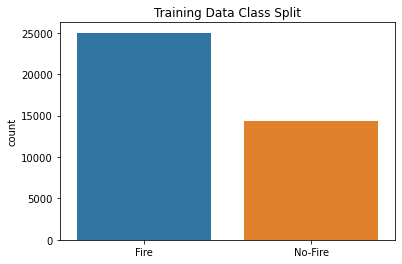

In [10]:
train = []
for image in training_data: #checks for class label and appends the corresponding label to a list
    if(image[1] == 0):
        train.append("Fire")
    elif(image[1] == 1):
        train.append("No-Fire")
sns.countplot(train).set_title("Training Data Class Split") #counts the number of each class and plots

C:\Anaconda\envs\ce802\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Test Data Class Split')

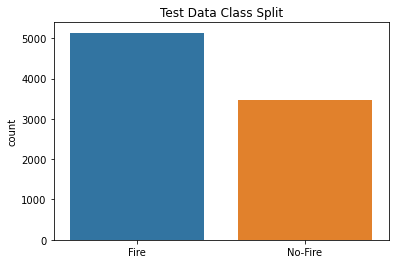

In [11]:
test = []
for image in test_data: #checks for class label and appends the corresponding label to a list
    if(image[1] == 0):
        test.append("Fire")
    elif(image[1] == 1):
        test.append("No-Fire")
sns.countplot(test).set_title("Test Data Class Split") #counts the number of each class and plots

In [12]:
print(train.count('Fire'))
print(train.count('No-Fire'))
print(test.count('Fire'))
print(test.count('No-Fire'))

print('Training class "Fire" ratio: ' + str(train.count('Fire')/(train.count('Fire')+train.count('No-Fire'))))

print('Test class "Fire" ratio: ' + str(test.count('Fire')/(test.count('Fire')+test.count('No-Fire'))))

25018
14357
5137
3480
Training class "Fire" ratio: 0.6353777777777778
Test class "Fire" ratio: 0.5961471509806197


Text(0.5, 1.0, 'Fire')

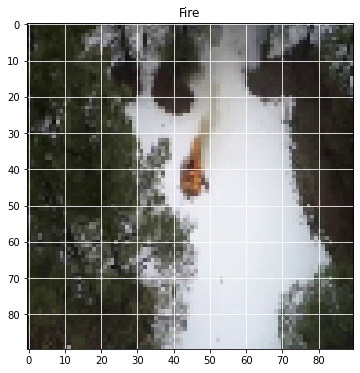

In [13]:
plt.figure(figsize = (6,6))
plt.imshow(training_data[1][0]) #shows the first image of training_data
plt.grid(color = 'w')
plt.title('Fire')

Text(0.5, 1.0, 'No-Fire')

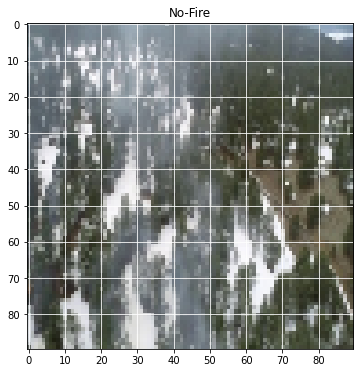

In [14]:
plt.figure(figsize = (6,6))
plt.imshow(training_data[-1][0]) #shows the last image of the training set, which will be a no-fire image as they were appended to training_data last
plt.grid(color = 'w')
plt.title('No-Fire')

In [15]:
#create empty lists to split out labels and attributes for each of our sets
attribute_train = []
attribute_val = []
attribute_test = []
label_train = []
label_val = []
label_test = []

#create separate lists for the training set so that we can first seperate the labels and attributes, and then split the training set into a training and validation set
trainng_attributes = []
training_labels = []

for attribute, label in training_data: #separates attributes and labels into seperate lists
    trainng_attributes.append(attribute)
    training_labels.append(label)
    
for attribute, label in test_data: #separates attributes and labels into seperate lists
    attribute_test.append(attribute)
    label_test.append(label)

In [16]:
#split the training set into a training and validation set, using stratification to maintain the ratio of the original training data labels
attribute_train, attribute_val, label_train, label_val = train_test_split(trainng_attributes, training_labels, test_size=0.2, stratify = training_labels)

In [17]:
#normalise the attribute data, and convert the attributes and labels back to arrays

attribute_train = np.array(attribute_train)/255

attribute_val = np.array(attribute_val)/255

attribute_test = np.array(attribute_test)/255

label_train = np.array(label_train)
label_val = np.array(label_val)
label_test = np.array(label_test)

In [21]:
#implement image augmentation by randomly flipping and rotating images in the training set to adjust for covariate shift between the test/training data

image_aug = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, rotation_range = 30, horizontal_flip = True, vertical_flip=False)

image_aug.fit(attribute_train)

Text(0.5, 1.0, 'attribute_train')

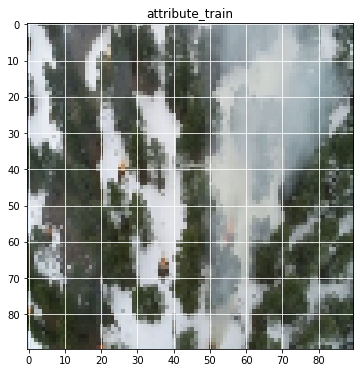

In [30]:
#confirm each attribute dataset is still stored correctly
plt.figure(figsize = (6,6))
plt.imshow(attribute_train[-1])
plt.grid(color = 'w')
plt.title('attribute_train')

Text(0.5, 1.0, 'attribute_val')

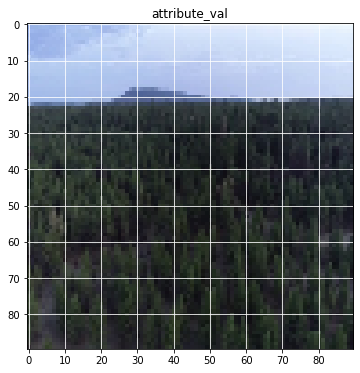

In [19]:
plt.figure(figsize = (6,6))
plt.imshow(attribute_val[-1])
plt.grid(color = 'w')
plt.title('attribute_val')

Text(0.5, 1.0, 'attribute_test')

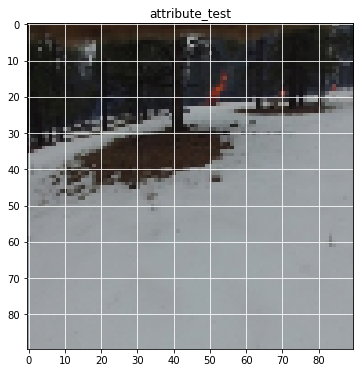

In [20]:
plt.figure(figsize = (6,6))
plt.imshow(attribute_test[1])
plt.grid(color = 'w')
plt.title('attribute_test')